In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utilsVisualize import getModelDataNum

In [2]:
modelName = "m16"
# modelName = "p16"
mode = "TEST"

In [3]:
cutoffRow = None
df, dfLong, dfWide = getModelDataNum(
    modelName, mode, visualizeMode="PHI_MAPE", cutoffRow=cutoffRow
)

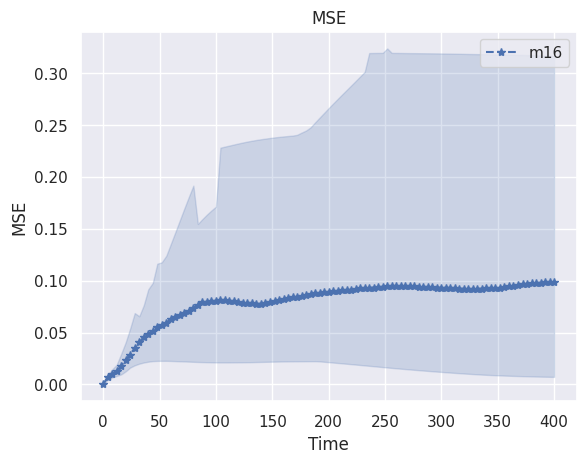

In [4]:
sns.set_theme()

fig, ax = plt.subplots()

xp = dfWide.index.values
yp = dfWide["median"].values
errU = dfWide["upper_whisker"]
errL = dfWide["lower_whisker"]

ax.plot(xp, yp, "--*", label=modelName)
ax.fill_between(xp, errU, errL, color="b", alpha=0.2)
ax.set_title(r"MSE")
ax.set_xlabel("Time")
ax.set_ylabel("MSE")

plt.legend()

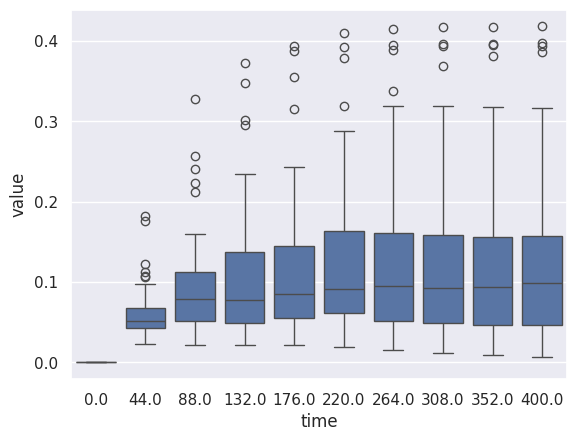

In [5]:
numBar = 10
tArrayPred = df.index.values
idxList = np.linspace(0, tArrayPred.shape[0] - 1, numBar).astype(int)
tList = tArrayPred[idxList]
filt = dfLong["time"].isin(tList)
ax = sns.boxplot(data=dfLong[filt], x="time", y="value", whis=1.5)